<a href="https://colab.research.google.com/github/shlear/MLDM-2022/blob/main/01-intro/DataHandling_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please, fill in before you start:

First Name:

Last Name:

Group:

### After the assigment is done, please, push it to a [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [goodevening13](https://github.com/goodevening13), [abdalazizrashid](https://github.com/abdalazizrashid) and [rogachevai](https://github.com/rogachevai) [as collaborators](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Get the Titanic dataset:

In [1]:
!wget https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv

--2023-01-03 06:42:07--  https://raw.githubusercontent.com/HSE-LAMBDA/MLDM-2022/main/01-intro/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2023-01-03 06:42:07 (5.13 MB/s) - ‘train.csv’ saved [60302/60302]



In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [74]:
# Compute survival rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
print("The first solution")
n = len(data)
classes = sorted(data.Pclass.unique())
for i in classes:
  print ("Class", i, ":", data.loc[data['Pclass']==i].Survived[data['Survived']==1].sum() / n)
# (can you do it using groupby?)
print("The second solution")
data.groupby(['Pclass']).Survived.sum()
for i in classes:
  print ("Class", i, ":", data.groupby('Pclass').Survived.sum()[i] / n)

The first solution
Class 1 : 0.1526374859708193
Class 2 : 0.09764309764309764
Class 3 : 0.1335578002244669
The second solution
Class 1 : 0.1526374859708193
Class 2 : 0.09764309764309764
Class 3 : 0.1335578002244669


## Task 2 (1 point)

array([0, 1, 2, 3, 4, 5, 8])

Text(0, 0.5, 'Parch (mean)')

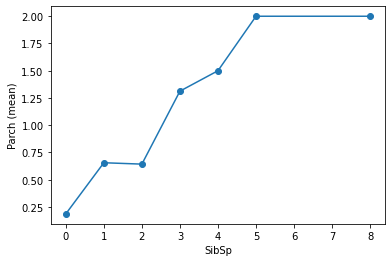

In [101]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt
x = np.array( sorted(data.SibSp.unique()) )
y = np.array( data.groupby('SibSp').Parch.mean() )

plt.scatter(x,y)
plt.plot(x,y)

plt.xlabel('SibSp')
plt.ylabel('Parch (mean)')


## Task 3 (2 points)

In [ ]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def feature_selection_and_preprocessing(dataset):
  # <YOUR CODE>
  # E.g.:
  features = dataset[["Fare", "Parch"]].copy()
  features["Fare"] /= features["Fare"].mean()

  features['Fare'] *= 1
  return features

model = KNeighborsClassifier(
    # <YOUR CODE>
    # E.g.
    n_neighbors=1
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [ ]:
from sklearn.model_selection import train_test_split

# <YOUR CODE>